In [2]:
import qiskit

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.0', 'qiskit': '0.44.0', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.6.1'}

In [4]:
from qiskit import IBMQ

In [5]:
IBMQ.save_account('d3d6c01de78d54264f5ed80dd50bb20ce73d189545426cac8b3d7a6dc08d9f4f0960fb7e9a7d00cc4baf7c97c9d07bc1df6191cd2bed99cdbfe03aa52fe4845c')

C:\Users\van\AppData\Local\Temp\ipykernel_24460\4081498893.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('d3d6c01de78d54264f5ed80dd50bb20ce73d189545426cac8b3d7a6dc08d9f4f0960fb7e9a7d00cc4baf7c97c9d07bc1df6191cd2bed99cdbfe03aa52fe4845c')
configrc.store_credentials:WARNING:2023-08-02 10:54:13,447: Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr,cr)
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
circuit.h(qr[0])

In [6]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [7]:
circuit.cx(qr[0],qr[1])

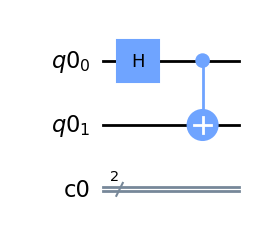

In [8]:
circuit.draw(output='mpl')

In [9]:
circuit.measure(qr,cr)

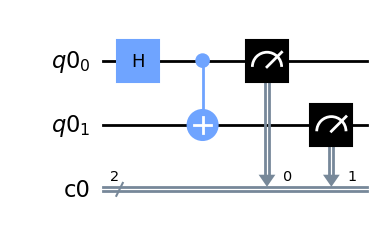

In [10]:
circuit.draw(output='mpl')

In [12]:
simulator = Aer.get_backend('qasm_simulator')

In [19]:
results = execute(circuit,backend= simulator).result()

In [20]:
from qiskit.tools.visualization import plot_histogram

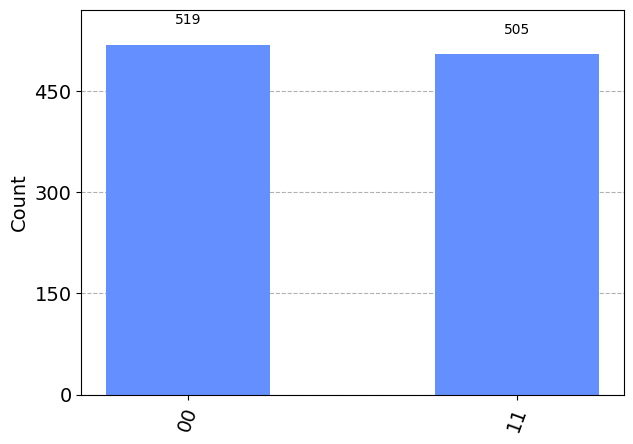

In [21]:
plot_histogram(results.get_counts(circuit))

In [32]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


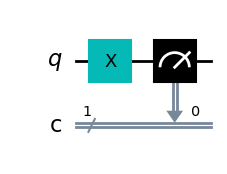

In [39]:
results = execute(circuit,backend= simulator).result()
statevector = results.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output= 'mpl')

# State Vector Representation on Bloch vector #

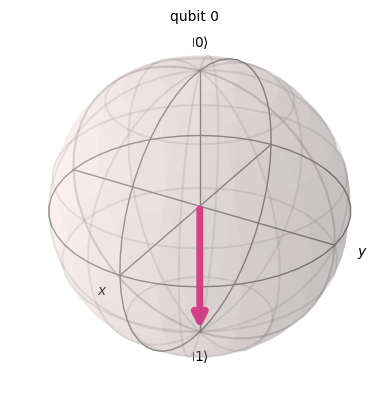

In [34]:
from qiskit.tools.visualization import *
plot_bloch_multivector(statevector)

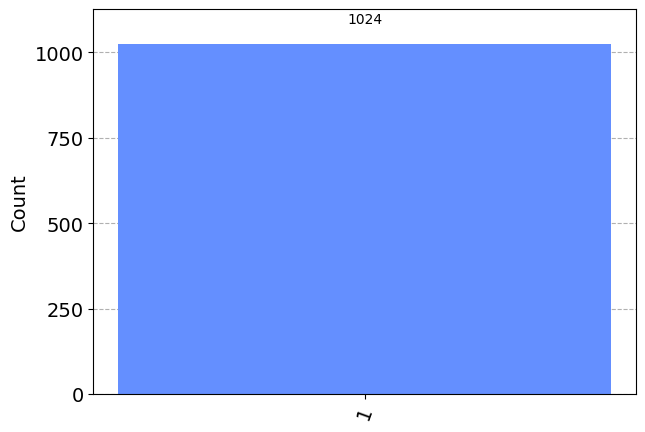

In [38]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= backend,shots= 1024).result()
counts = result.get_counts()
plot_histogram(counts)

# Matrix Representation #

In [41]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
results = execute(circuit,backend= simulator).result()
unitary = results.get_unitary()
print(unitary)


Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


# Quantum Teleportation Algorithm #
Quantum teleportation is a technique for transferring quantum information from a sender at one location to a receiver some distance away. While teleportation is commonly portrayed in science fiction as a means to transfer physical objects from one location to the next, quantum teleportation only transfers quantum information. The sender does not have to know the particular quantum state being transferred. Moreover, the location of the recipient can be unknown, but to complete the quantum teleportation, classical information needs to be sent from sender to receiver. Because classical information needs to be sent, quantum teleportation cannot occur faster than the speed of light. This is because when you copying you are measuring the qubit which will lose the information

In [71]:
from qiskit import *
circuit = QuantumCircuit(3,3)

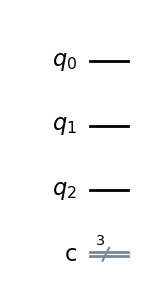

In [72]:
%matplotlib inline
circuit.draw(output='mpl')

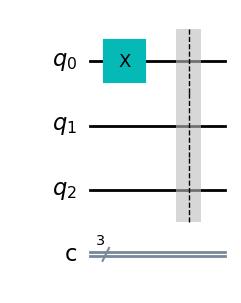

In [73]:
# Apply X-gate to the first qbit
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

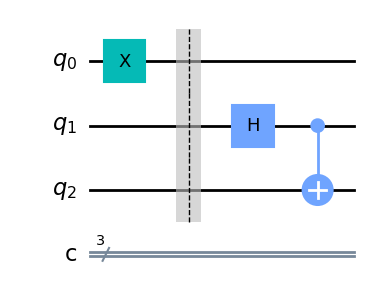

In [74]:
#Create entanglement between q1 and q2
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

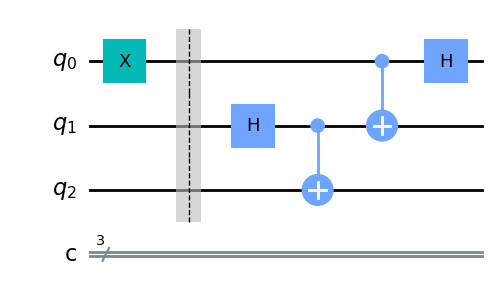

In [75]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

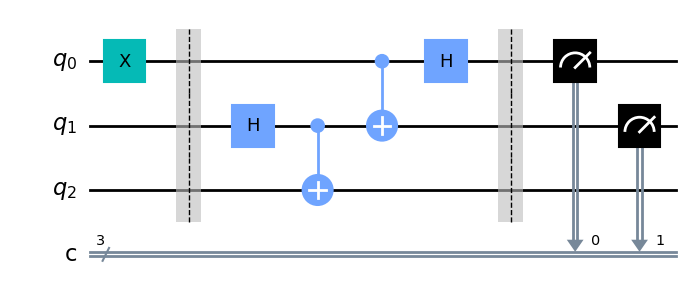

In [76]:
# Do the measurement on q0 and q1
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

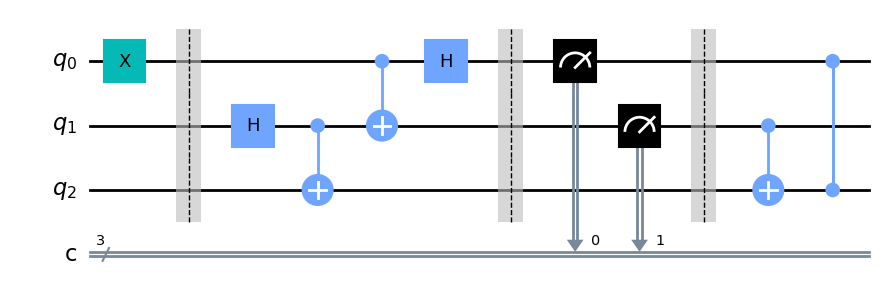

In [77]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

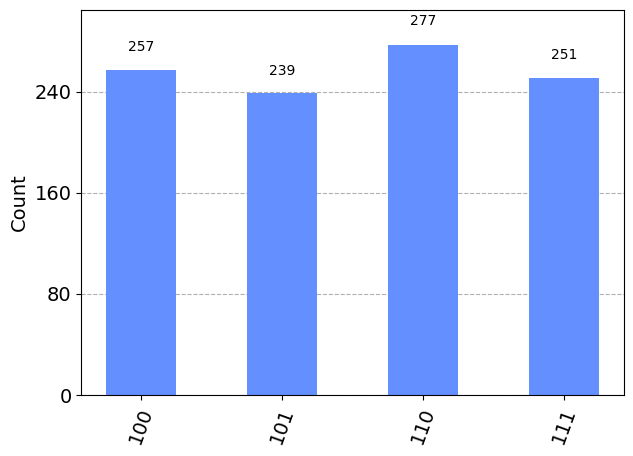

In [78]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= simulator , shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import *
plot_histogram(counts)

#### Applying quantum teleportation on a $ \frac{∣0⟩+∣1⟩}{\sqrt(2)} $ state ####

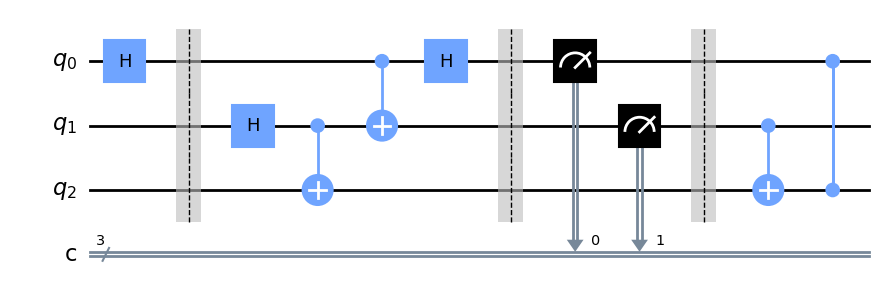

In [79]:
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

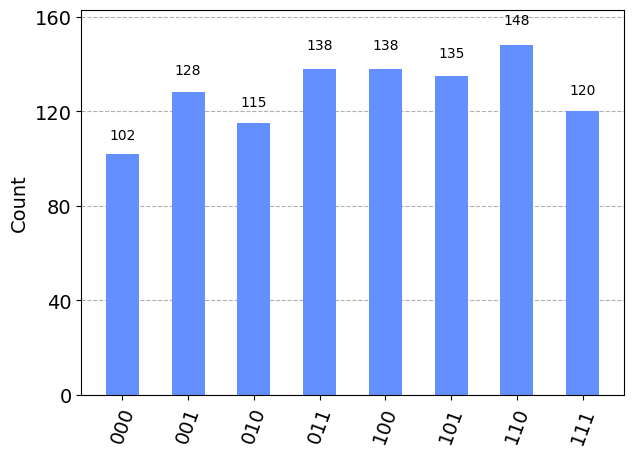

In [80]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= simulator , shots= 1024).result()
counts = result.get_counts()
plot_histogram(counts)

# Bernstein-Vazirani Algorithm #
The Bernstein–Vazirani algorithm, which solves the Bernstein–Vazirani problem, is a quantum algorithm invented by Ethan Bernstein and Umesh Vazirani in 1992. It is a restricted version of the Deutsch–Jozsa algorithm where instead of distinguishing between two different classes of functions, it tries to learn a string encoded in a function. The Bernstein–Vazirani algorithm was designed to prove an oracle separation between complexity classes BQP and BPP.

In [81]:
from qiskit import *
from qiskit.tools.visualization import *
s = '101001'

The algorithm has four main parts.

1.Initialize the first n
 qubits in the state ∣0⟩
, and the last qubit in the ∣1⟩
 state. In Qiskit, all qubits are initialized in the ∣0⟩
 state, so we don't need to do anything to the first n
 qubits. For the last qubit, we initialize it to ∣1⟩
 state by applying an X
 gate.

2.Apply Hadamard gates to all qubits.

3.Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes s.x
 modulo 2 by applying CX
 gates from the first n
 qubits onto the last qubit whenever there is a 1
 in the secret number. We will do this in reverse order, meaning that the there will be a CX
 gate from the n
th qubit to the last qubit if the first bit of the secret number is 1.

4.Measure the first n
 qubits in the Bell basis. This means applying Hadamard gates to the first 
 qubits again before applying measurements.

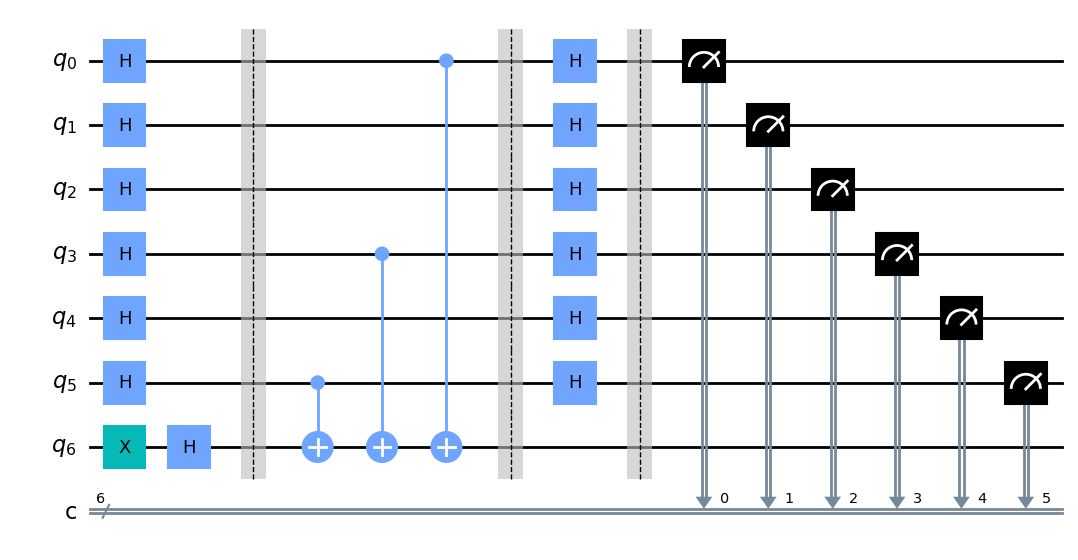

In [112]:
circuit = QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)

circuit.barrier()

circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
%matplotlib inline
circuit.draw(output='mpl')

In [114]:

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [115]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

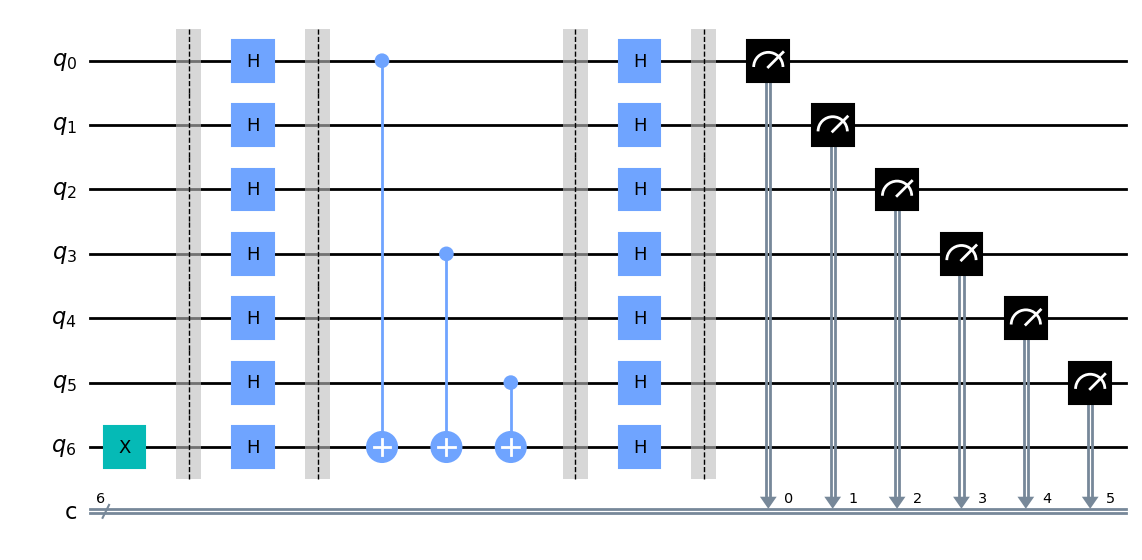

In [116]:
%matplotlib inline
circuit.draw(output='mpl')

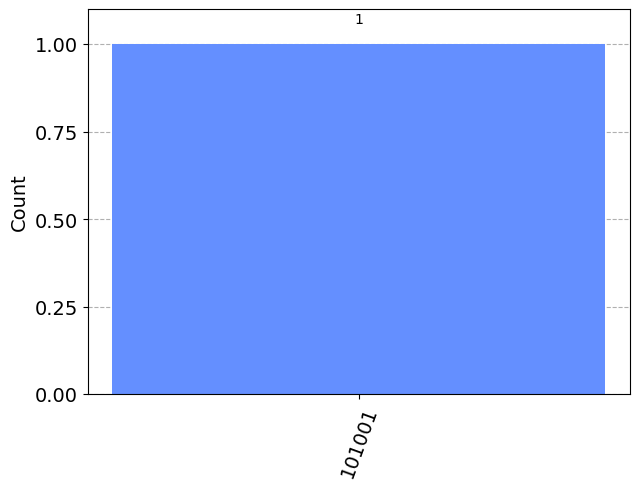

In [117]:

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

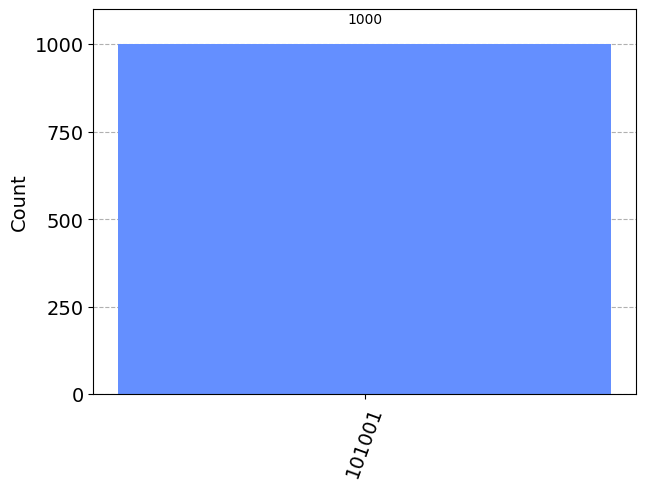

In [118]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

# Mitigating Noise on Real Quantum Computers #

In [14]:
from qiskit import *
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

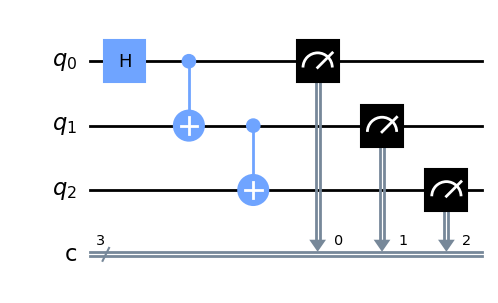

In [15]:
%matplotlib inline
circuit.draw(output='mpl')

In [3]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit,backend=simulator,shots=1024).result()

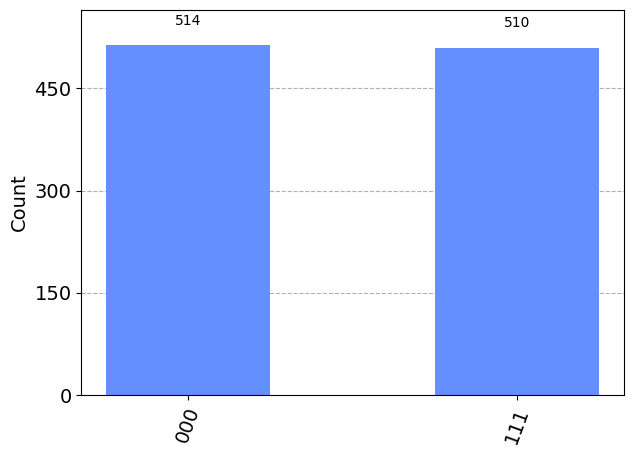

In [4]:
from qiskit.visualization import *
plot_histogram(sim_result.get_counts())

In [12]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2023-08-03 11:59:15,734: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
job = execute(circuit, backend=device, shots=1024)
#print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


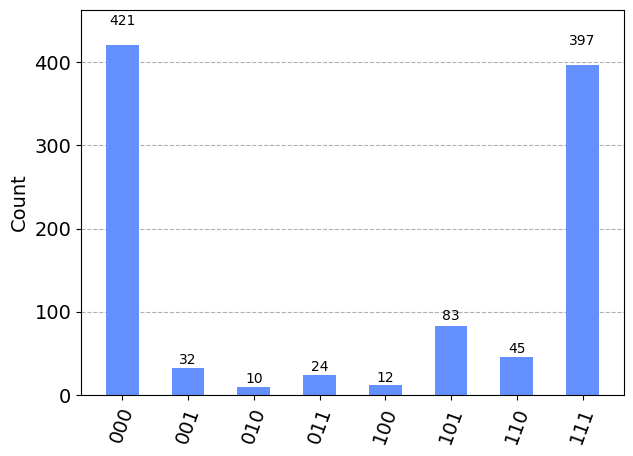

In [17]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))